<a href="https://colab.research.google.com/github/bbcx-investments/notebooks/blob/main/factor_investing/quintiles_boxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

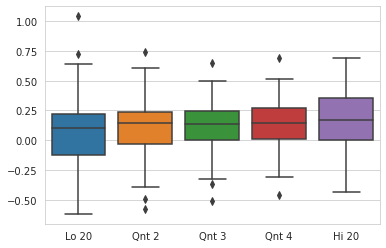

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from pandas_datareader import DataReader as pdr

# associate names of French files with characteristic names
files = {'Earnings to price ratio': 'Portfolios_Formed_on_E-P',\
 'Variance': 'Portfolios_Formed_on_VAR',\
 'Accruals': 'Portfolios_Formed_on_AC',\
 'Residual variance': 'Portfolios_Formed_on_RESVAR',\
 'Net equity issuance': 'Portfolios_Formed_on_NI',\
 'Beta': 'Portfolios_Formed_on_BETA',\
 'Cash flow to price': 'Portfolios_Formed_on_CF-P',\
 'Market equity': 'Portfolios_Formed_on_ME',\
 'Book to market ratio': 'Portfolios_Formed_on_BE-ME',\
 'Dividend to price ratio': 'Portfolios_Formed_on_D-P',\
 'Investment rate': 'Portfolios_Formed_on_INV',\
 'Momentum': '10_Portfolios_Prior_12_2',\
 'Short term reversal': '10_Portfolios_Prior_1_0',\
 'Long term reversal': '10_Portfolios_Prior_60_13'}

# sort characteristics in alphabetical order
keys = np.sort(list(files.keys()))

df = None
# loop over files
for key in keys :

    # read file
    f = files[key]
    d = pdr(f,'famafrench',start=1920)[2]/100

    # for momentum and reversal files, combine deciles to form quintiles
    if 'Portfolios_Formed_on' not in f :
        cols = d.columns.to_list()
        d['Lo 20'] = d[cols[:2]].mean(axis=1)
        d['Qnt 2'] = d[cols[2:4]].mean(axis=1)
        d['Qnt 3'] = d[cols[4:6]].mean(axis=1)
        d['Qnt 4'] = d[cols[6:8]].mean(axis=1)
        d['Hi 20'] = d[cols[8:]].mean(axis=1)
    
    # for other files, extract quintiles
    quintiles = ['Lo 20','Qnt 2','Qnt 3','Qnt 4','Hi 20']
    d = d[quintiles].copy()

    # add characteristic to the index
    d['Characteristic'] = key
    d = d.reset_index().set_index(['Date','Characteristic'])

    # add to df
    df = pd.concat((df,d))

# convert to wide format with multi-indexed columns
df = df.stack().swaplevel(1,2).unstack().unstack()

# example start date and characteristic
start = 1980
char = 'Momentum'
sns.boxplot(data=df[char])
